In [354]:
library(ggplot2)
library(ggcorrplot)
library(hrbrthemes)
library(GGally)
library(FactoMineR)
library(stats)
library(glmnet)
library(ggfortify)

default_theme <- theme_ipsum(base_family = "") + theme(
  axis.title.x = element_text(hjust = 0.5),
  axis.title.y = element_text(hjust = 0.5),
  plot.margin = margin(
    t = 0.5,
    r = 2, b = 0.5, l = 2, "cm"
  ),
  legend.position = "bottom"
)

theme_set(default_theme)

# Data analysis

In [355]:
df <- read.table("rain_project.txt", sep = " ", header = T)
numeric_idx <- 3:18

1. Replace the variable date by a categorial variable month.

In [356]:
df$date <- months(as.Date(df$date))

In [357]:
df[c(2, 19)] <- lapply(df[c(2, 19)], as.factor)

In [358]:
head(df)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,22092001_527,June,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,March,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,July,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,May,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,February,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,December,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


2. Start with some unidimensional descriptive statistics of the dataset. Can you see anomalies?

In [359]:
g_boxplot_df <- stack(
  data.frame(scale(df[3:18], center = T, scale = T))
) %>% ggplot(aes(x = ind, y = values)) +
  geom_boxplot() +
  scale_x_discrete(guide = guide_axis(n.dodge = 4))

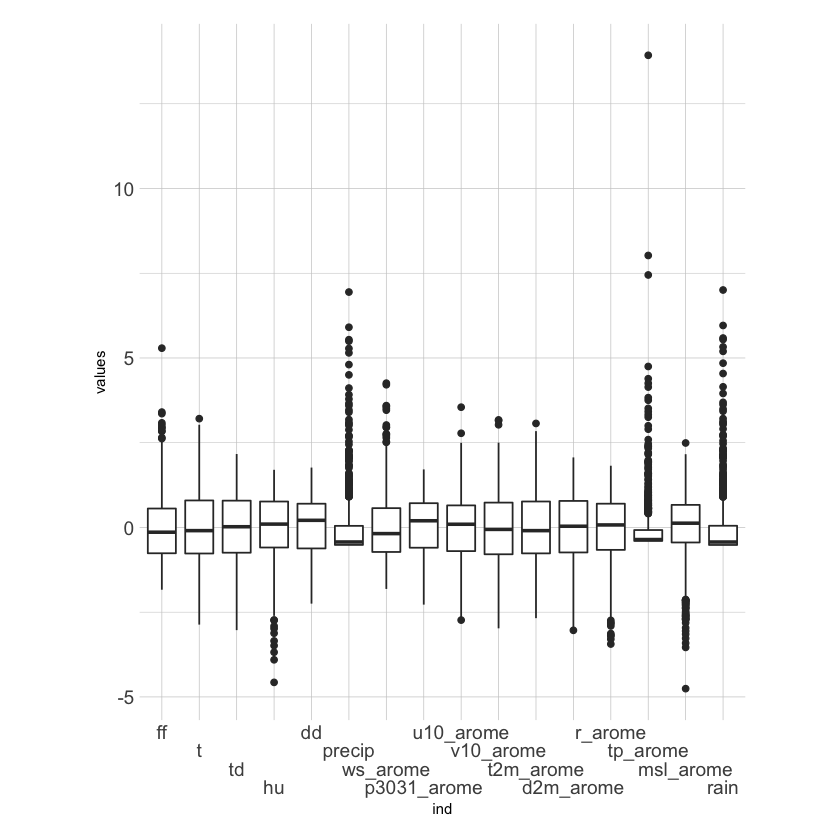

In [360]:
g_boxplot_df

In [361]:
g_boxplot_rd <- df %>% ggplot(aes(x = date, y = rain)) +
  geom_boxplot() +
  scale_x_discrete(guide = guide_axis(n.dodge = 2))

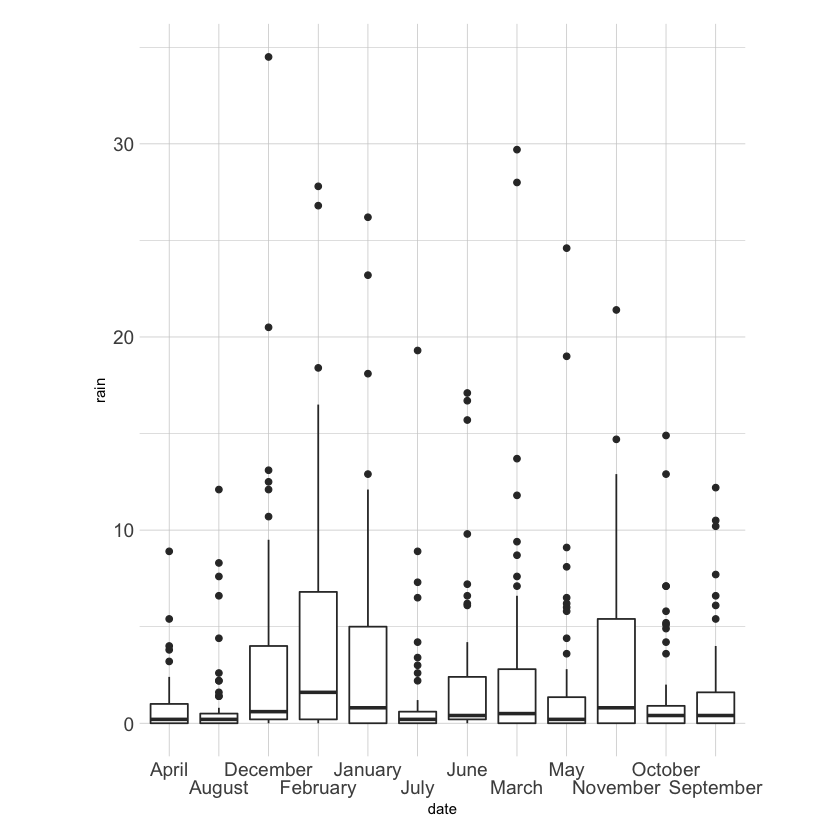

In [362]:
g_boxplot_rd

In [363]:
df[3:18]

,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.945000,289.4087,285.2771,78.78333,246.75000,0.0,3.663785,244.29950,3.03850285,1.41635990,289.2323,285.1709,79.03778,2.32827686,101672.85,0.2
2,3.739583,276.3758,273.4225,81.70000,260.33333,1.2,3.328476,305.66075,2.46388583,-1.89897085,275.8087,273.6726,86.33160,10.67544072,100583.76,4.2
3,3.273750,288.8692,286.7233,87.62083,259.04167,0.2,3.232380,256.04239,2.96387153,0.98562674,289.6274,286.4851,82.30103,4.58230922,101482.98,0.0
4,1.745000,284.2887,280.2158,76.58750,216.54167,0.0,1.720926,139.29727,-0.26069260,-1.39760281,284.7261,280.3673,75.38412,0.94025369,102223.59,0.0
5,5.718750,277.5279,274.5292,81.39167,285.54167,1.6,4.424012,285.57880,3.94005564,-1.45760575,277.7517,274.5907,80.43509,13.90307622,102416.22,0.0
6,1.750000,277.3533,275.1396,86.20417,140.87500,0.2,1.780965,157.83116,0.14460321,0.66209921,275.2941,273.0910,85.25869,0.20598334,103463.95,0.2
8,7.841250,277.5017,274.8046,82.69167,47.08333,0.0,6.041868,47.66490,-4.43896687,-4.07309944,278.0894,275.3051,82.42401,0.03063836,101994.06,0.0
9,3.258750,284.9925,282.0142,82.96667,232.08333,6.2,3.194742,233.30273,2.46737127,1.83627538,285.5150,282.2135,81.91323,25.90317883,101781.63,16.7
10,4.650417,276.6300,276.2725,97.43750,75.50000,8.7,3.796306,67.14271,-2.86602176,-1.56467415,277.1178,276.5960,96.42106,168.32141070,101090.02,0.2


In [364]:
sk_df <- apply(df[3:18], 2, moments::skewness)

In [365]:
print(sk_df)

         ff           t          td          hu          dd      precip 
  0.8488968   0.1486239  -0.2890090  -0.7708586  -0.6157519   3.1625686 
   ws_arome p3031_arome   u10_arome   v10_arome   t2m_arome   d2m_arome 
  0.9681594  -0.5849979  -0.1189831   0.2621210   0.1261369  -0.3005220 
    r_arome    tp_arome   msl_arome        rain 
 -0.5877382   6.5566380  -0.8643702   3.1763589 


In [366]:
g_hist_df_fun <- function(x) {
  g <- df %>% ggplot(aes_string(x = x)) +
    geom_histogram(
      position = "identity", colour = "grey40", alpha = 0.2
    ) +
    ggtitle(paste("Histogram of", x))
  return(g)
}

In [367]:
g_hist_df <- lapply(colnames(df[numeric_idx]), FUN = g_hist_df_fun)

`rain` will not be transformed because it is the response variable.

Similarly, we will not transform `*_arome` because it is the output of the Météo France AROME model.

In [368]:
corr_df <- cor(df[numeric_idx])
g_corr_df <- ggcorrplot(corr_df, type = "lower")

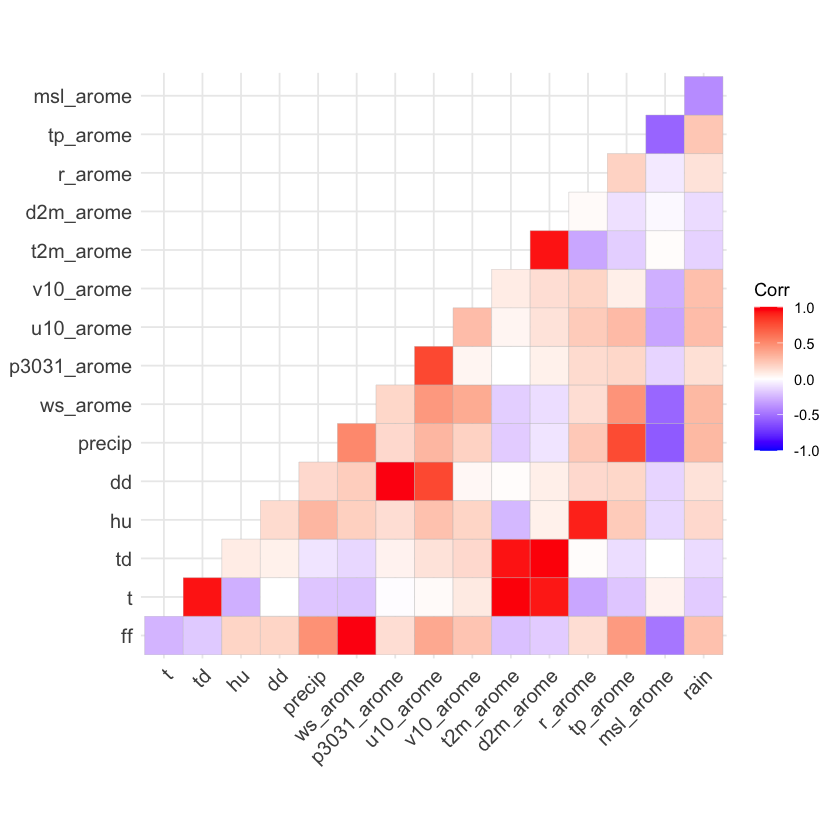

In [369]:
g_corr_df

4. Consider the quantitative variables, except `rain` and perform a principal component analysis. Can you see clusters? Are they linked with the `rain_classes`?

In [370]:
pca <- PCA(
  df[c(19, numeric_idx)],
  scale.unit = T, graph = F, quali.sup = 1, ncp = 7
)


In [371]:
g_bar_intertia <- ggplot() +
  geom_col(aes(names(pca$eig[, 2]), unname(pca$eig[, 2]))) +
  scale_x_discrete(
    guide = guide_axis(check.overlap = T),
    limits = names(pca$eig[, 2])
  )

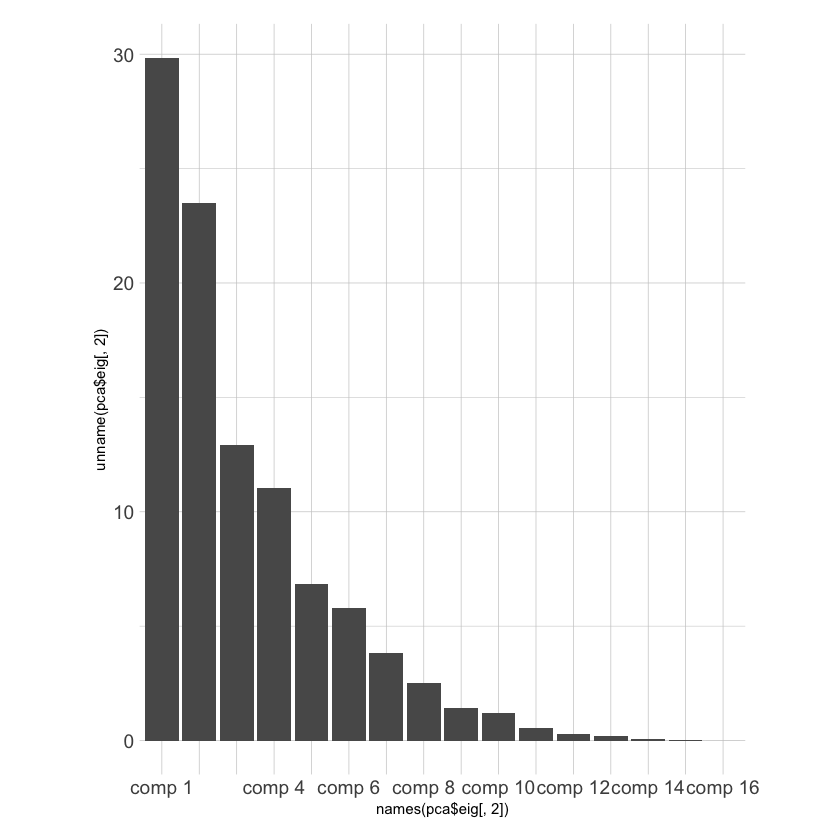

In [372]:
g_bar_intertia

In [373]:
g_boxplot_coord <- stack(
  data.frame(pca$ind$coord)
) %>% ggplot(aes(x = ind, y = values)) +
  geom_boxplot()

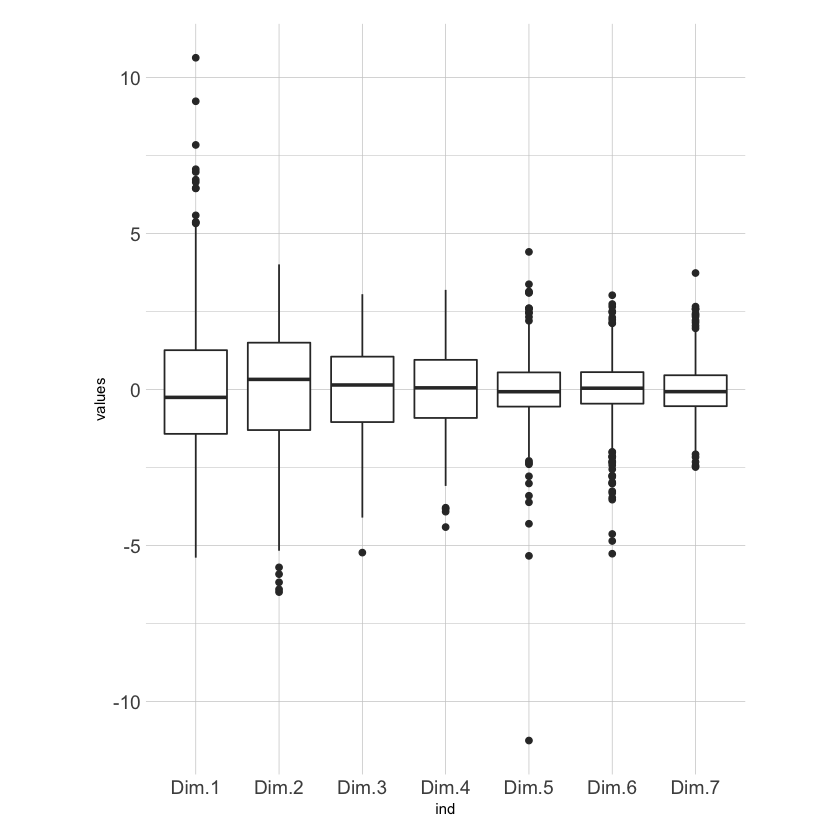

In [374]:
g_boxplot_coord

In [375]:
g_varcor <- plot(
  pca,
  choix = "varcor",
  grah.type = "ggplot",
) + default_theme

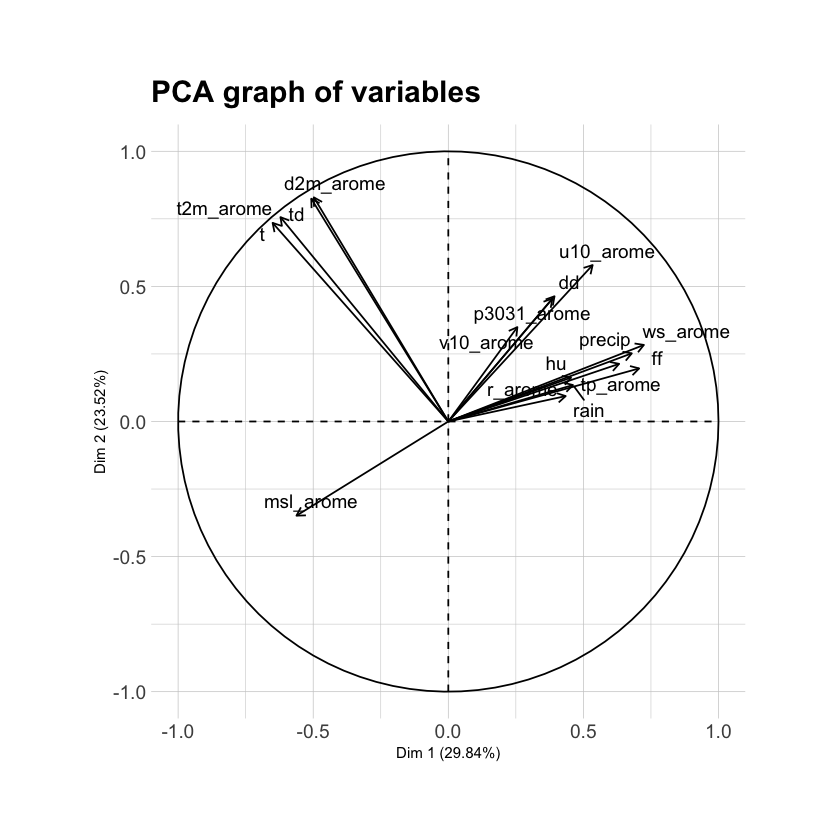

In [376]:
g_varcor

In [377]:
rain_col <- c("blue", "orange", "red")

g_ind_rain <- plot(
  pca,
  choix = "ind",
  unselect = 0,
  grah.type = "ggplot",
  habillage = 1,
  col.hab = rain_col,
  label = "none",
  title = ""
) + default_theme

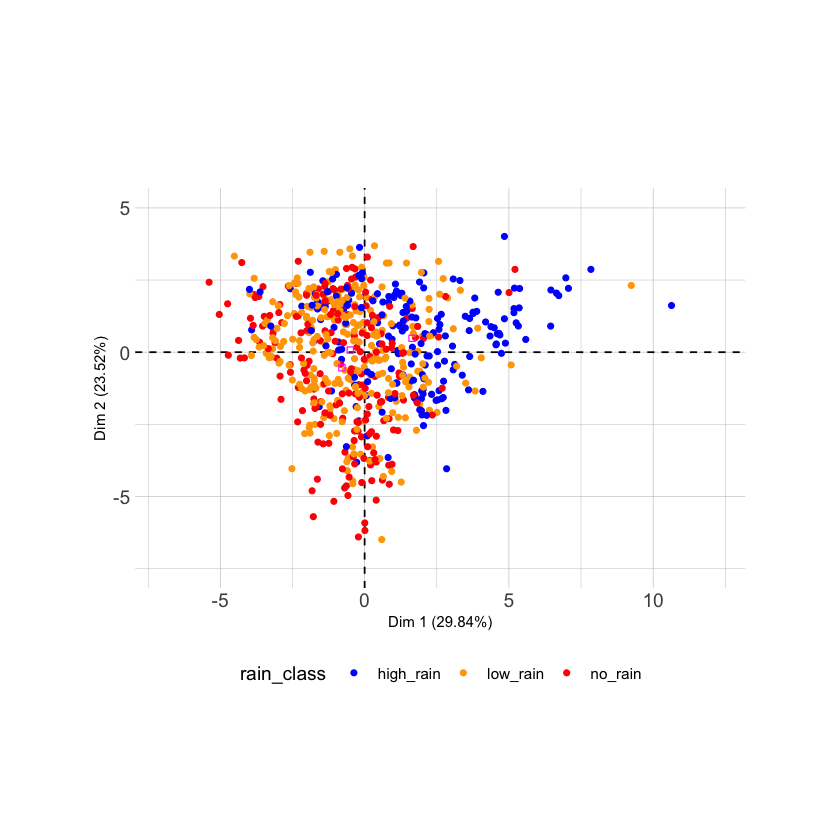

In [378]:
g_ind_rain

In [379]:
km_rain <- kmeans(df[numeric_idx], centers = 3)

In [380]:
g_ind_kmeans <- plot(
  pca,
  choix = "ind",
  unselect = 0,
  grah.type = "ggplot",
  habillage = "ind",
  col.hab = sapply(
    unname(km_rain$cluster), function(i) rain_col[i]
  ),
  label = "none",
  title = ""
) + default_theme

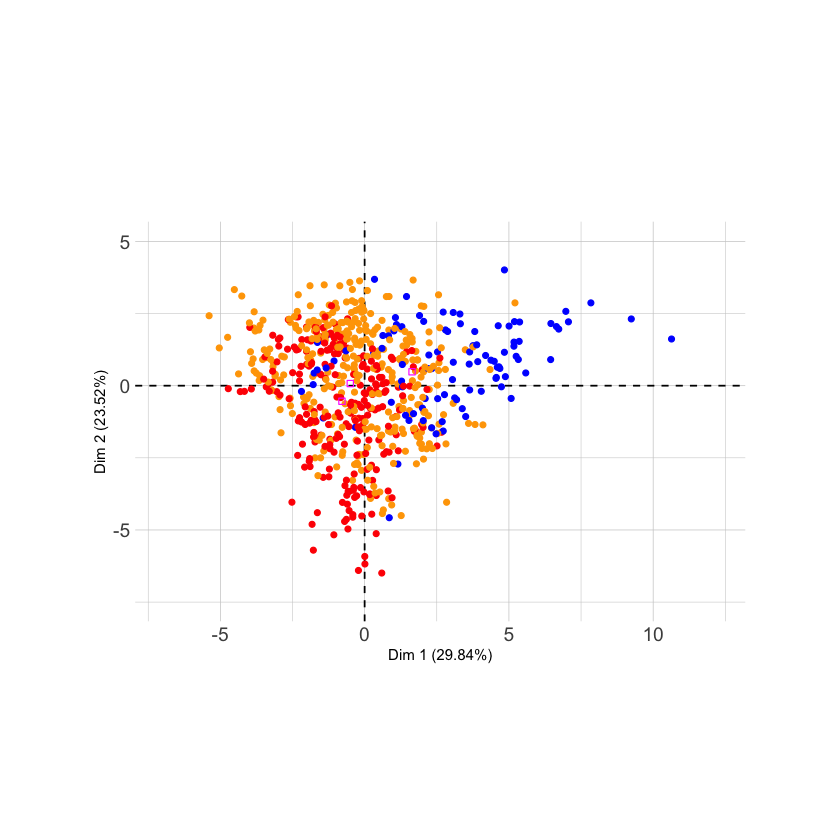

In [381]:
g_ind_kmeans

The clusters are close to the `rain_class`.

# Models

1. First of all, split the data into a training set and a test set. Why is this step necessary when we focus on performance?

In [382]:
set.seed(111)
test_ratio <- .2
npop <- nrow(df)
nvar <- ncol(df)
ntest <- ceiling(npop * test_ratio)
test_idx <- sample(1:npop, ntest)
learn_idx <- setdiff(1:npop, test_idx)

In [383]:
df_learn_r <- df[learn_idx, -c(1, 19)]
df_test_r <- df[test_idx, -c(1, 19)]
df_learn_rc <- df[learn_idx, -c(1, 18)]
df_test_rc <- df[test_idx, -c(1, 18)]

In [384]:
plot_res_fit <- function(fit, res) {
  g <- ggplot() +
    geom_point(
      aes(fit, res),
      color = "#69b3a2", size = 1, alpha = 0.75
    ) +
    geom_hline(yintercept = 0, linetype = "longdash")
  return(g)
}

plot_res_qq <- function(res) {
  g <- data.frame(res) %>% ggplot(aes(sample = res)) +
    geom_qq(
      color = "#69b3a2", size = 1, alpha = 0.75
    ) +
    geom_qq_line(linetype = "longdash")
  return(g)
}

## Linear Model

Model without interation

In [385]:
lm_no_int <- aov(rain ~ ., df_learn_r)

In [386]:
g_lm_no_int_fit <- plot_res_fit(
  lm_no_int$fitted.values, lm_no_int$residuals
)

g_lm_no_int_qq <- plot_res_qq(
  lm_no_int$residuals
)

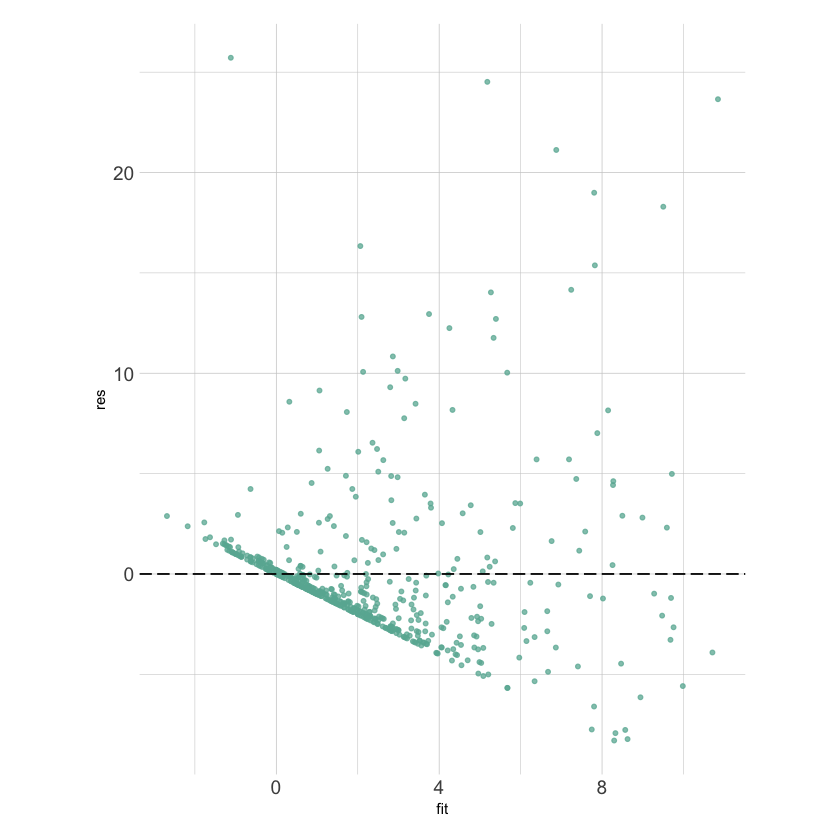

In [387]:
g_lm_no_int

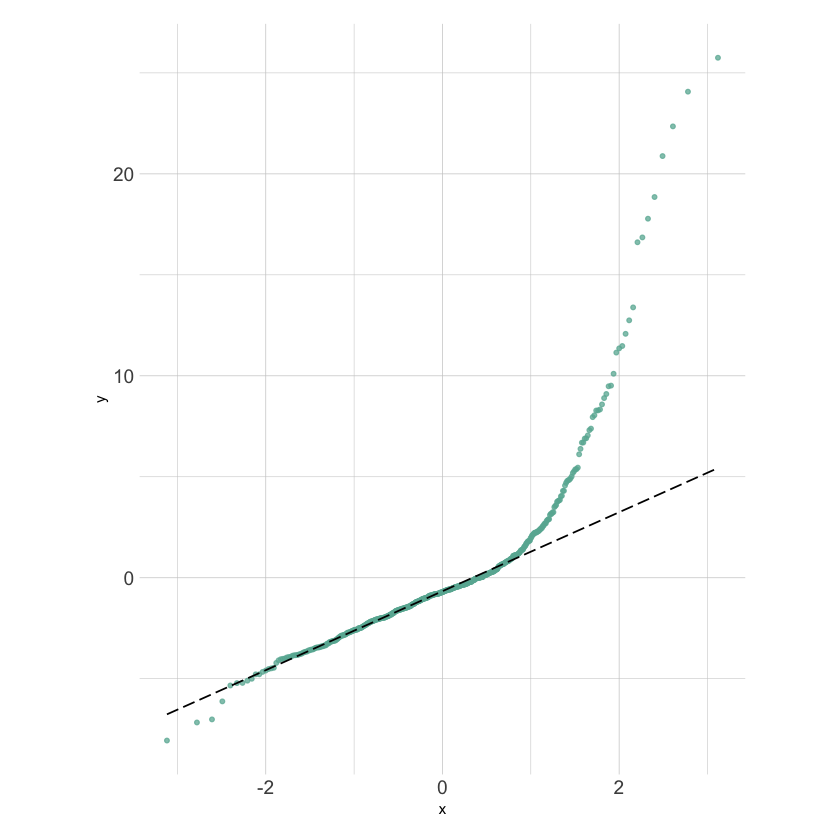

In [388]:
g_lm_no_int_qq

In [389]:
g_arome_fit <- plot_res_fit(
  df_learn_r$tp_arome, df_learn_r$tp_arome - df_learn_r$rain
)

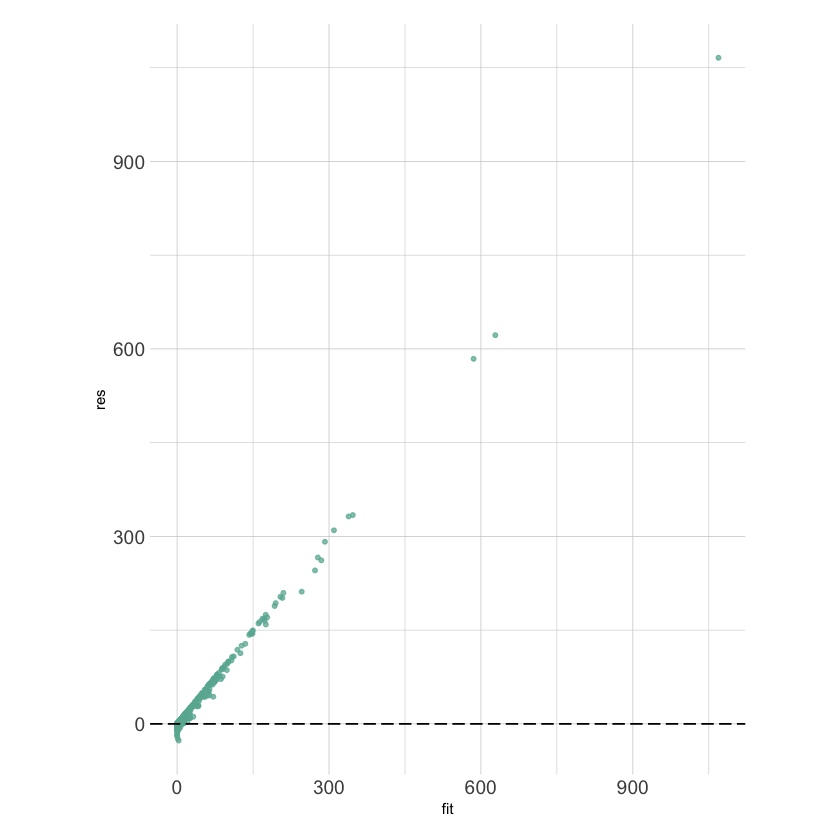

In [390]:
g_arome_fit

## LASSO

In [391]:
lasso_quanti <- glmnet(df_learn_r[, -c(1, 17)], df_learn_r$rain)

In [392]:
model_matrix <- model.matrix(rain ~ . - 1, data = df_learn_r)

In [393]:
lasso <- glmnet(model_matrix, df_learn_r$rain)

In [394]:
g_lasso_lambda <- autoplot(lasso, "lambda", label = F)

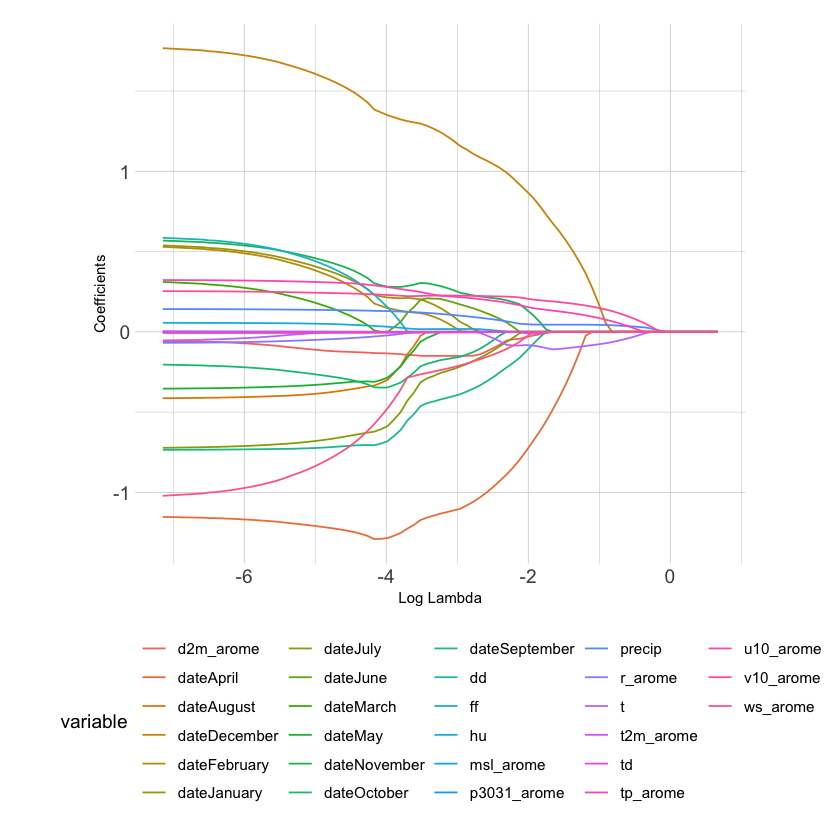

In [395]:
g_lasso_lambda

In [396]:
lasso_cv <- cv.glmnet(model_matrix, df_learn_r$rain)

In [397]:
g_lasso_cv <- autoplot(
  lasso_cv,
  colour = alpha("grey", 0.75)
)

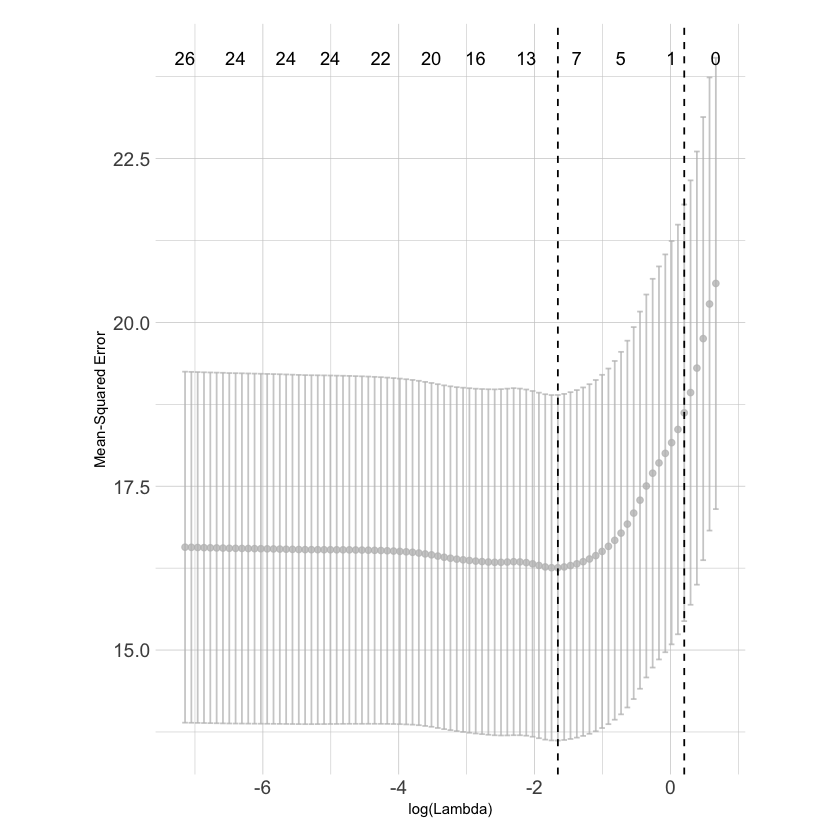

In [398]:
g_lasso_cv

In [399]:
paste("CV estimate of lambda :", round(lasso_cv$lambda.1se, 3))

[1] "CV estimate of lambda : 1.226"

In [400]:
coef(lasso_cv, s = "lambda.1se")

28 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)   72.8345067414
dateApril      .           
dateAugust     .           
dateDecember   .           
dateFebruary   .           
dateJanuary    .           
dateJuly       .           
dateJune       .           
dateMarch      .           
dateMay        .           
dateNovember   .           
dateOctober    .           
dateSeptember  .           
ff             .           
t              .           
td             .           
hu             .           
dd             .           
precip         .           
ws_arome       .           
p3031_arome    .           
u10_arome      .           
v10_arome      .           
t2m_arome      .           
d2m_arome      .           
r_arome        .           
tp_arome       .           
msl_arome     -0.0006940856

In [401]:
g_lasso_lambda_cv <- autoplot(lasso, "lambda", label = F) +
  geom_vline(
    xintercept = log(lasso_cv$lambda.1se),
    colour = "red", linetype = "longdash"
  )

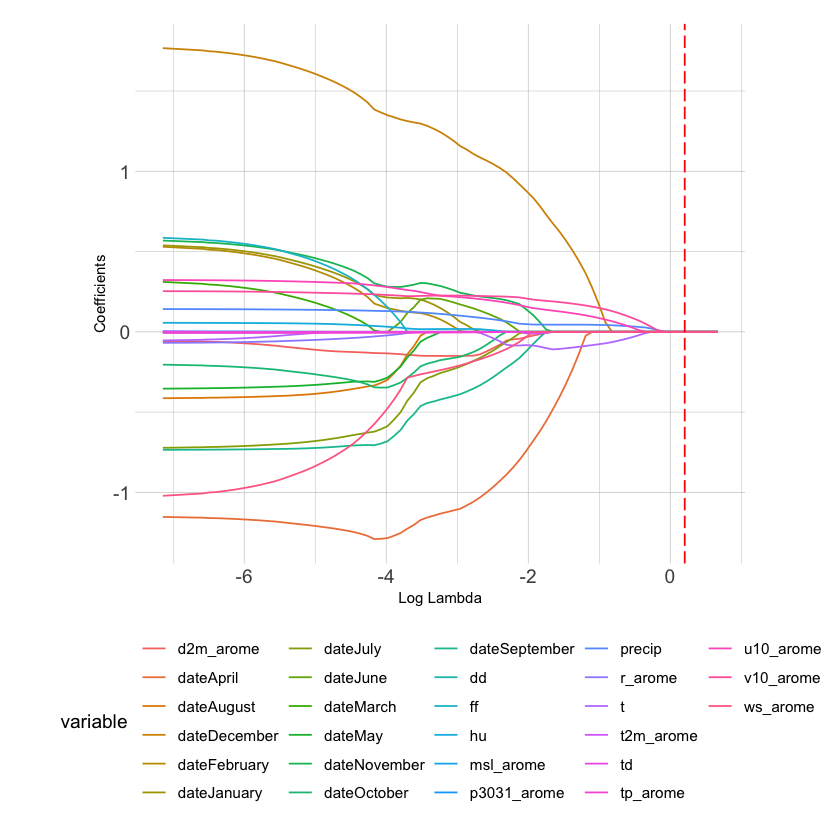

In [402]:
g_lasso_lambda_cv

In [403]:
paste("CV estimate of lambda :", round(lasso_cv$lambda.min, 3))

[1] "CV estimate of lambda : 0.191"

In [404]:
coef(lasso_cv, s = "lambda.min")

28 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)    1.720450e+02
dateApril     -4.855209e-01
dateAugust     .           
dateDecember   6.770762e-01
dateFebruary   .           
dateJanuary    .           
dateJuly       .           
dateJune       .           
dateMarch      .           
dateMay        .           
dateNovember   .           
dateOctober    .           
dateSeptember  .           
ff             .           
t             -1.094445e-01
td             .           
hu             .           
dd             .           
precip         4.459827e-02
ws_arome       .           
p3031_arome    .           
u10_arome      1.320659e-01
v10_arome      1.896352e-01
t2m_arome     -9.597184e-04
d2m_arome      .           
r_arome        .           
tp_arome       .           
msl_arome     -1.366500e-03

In [405]:
g_lasso_lambda_min <- autoplot(lasso, "lambda", label = F) +
  geom_vline(
    xintercept = log(lasso_cv$lambda.min),
    colour = "red", linetype = "longdash"
  )

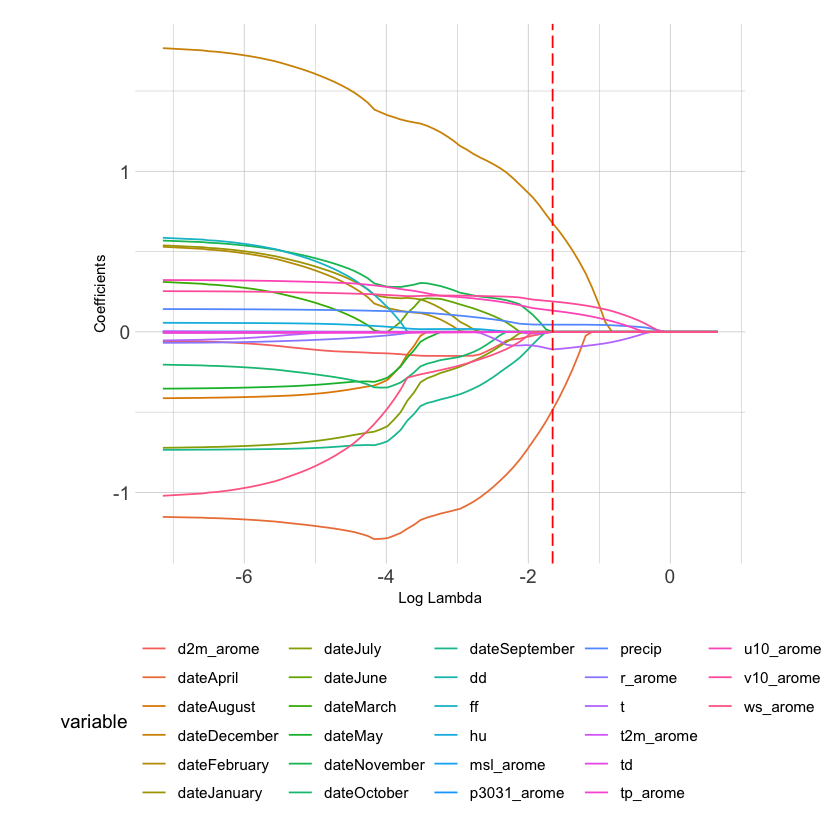

In [406]:
g_lasso_lambda_min

In [407]:
fit_lasso_min <- predict(lasso_cv, s = "lambda.min", newx = model_matrix)
res_lasso_min <- df_learn_r$rain - fit_lasso_min

In [408]:
fit_lasso_1se <- predict(lasso_cv, s = "lambda.1se", newx = model_matrix)
res_lasso_1se <- df_learn_r$rain - fit_lasso_1se

In [409]:
g_lasso_min_res_fit <- plot_res_fit(fit_lasso_min, res_lasso_min)

In [410]:
g_lasso_1se_res_fit <- plot_res_fit(fit_lasso_1se, res_lasso_1se)

In [413]:
paste("Linear model without selection:", mean(lm_no_int$residuals^2))
paste("LASSO avec lambda.min:", mean(res_lasso_min^2))
paste("LASSO avec lambda.1se:", mean(res_lasso_1se^2))

[1] "Linear model without selection: 14.7363740245677"

[1] "LASSO avec lambda.min: 15.4067193613131"

[1] "LASSO avec lambda.1se: 18.2653383353557"